# EDA Insights

### DOMAIN: ECOMMERCE | INDIAN HERBAL SKIN/HAIR CARE PRODUCTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('master_orders.csv', parse_dates=['Created at'])
orders = pd.read_csv('orders.csv')
orders_raw = pd.read_csv('orders_raw.csv')
rfm = pd.read_csv('rfm.csv')

In [3]:
df.head()

,Order ID,Customer ID,Created at,Financial Status,Net Revenue,Contribution Margin,Lineitem sku,Lineitem quantity,Lineitem total price,Gross Margin %,Order Year,Order Month,Days Since Order
0,110460500,1220,2025-11-11,pending,1112.0,1062.0,HERB002,5,900,38.888889,2025,11,63
1,110460501,1116,2025-11-29,paid,1406.0,1356.0,HERB003,4,1200,36.666667,2025,11,45
2,110460502,1376,2025-11-15,paid,1406.0,1376.0,HERB003,4,1200,36.666667,2025,11,59
3,110460503,1165,2025-11-05,paid,1032.0,962.0,HERB002,5,900,38.888889,2025,11,69
4,110460504,1379,2025-11-06,paid,249.6,199.6,HERB005,1,220,36.363636,2025,11,68


### 1. Revenue Health Audit

1.1. Total Revenue Breakdown

In [4]:
revenue_breakdown = df.groupby('Financial Status')['Net Revenue'].sum().sort_values(ascending=False).round(2)
print("\nRevenue by Financial Status:")
print(revenue_breakdown)


Revenue by Financial Status:
Financial Status
paid       362502.6
pending     36860.0
Name: Net Revenue, dtype: float64


1.2. Net Revenue vs Gross

In [5]:
df['Gross Revenue'] = orders['Total Price']
orders['Gross Revenue'] = df['Gross Revenue']

In [6]:
leakage = df['Gross Revenue'].sum() - df['Net Revenue'].sum()

1.3. AOV & Key Metrics

In [7]:
metrics = {
    'AOV': df['Net Revenue'].mean(),
    'Orders' : len(df),
    'Customers' : df['Customer ID'].nunique(),
    'Repeat Rate': df[df['Customer ID']>0]['Customer ID'].value_counts().gt(1).mean(),
    'Refund Rate' : len(orders_raw[orders_raw['Financial Status'] == 'refunded']) / len(orders_raw)}

metric_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])    

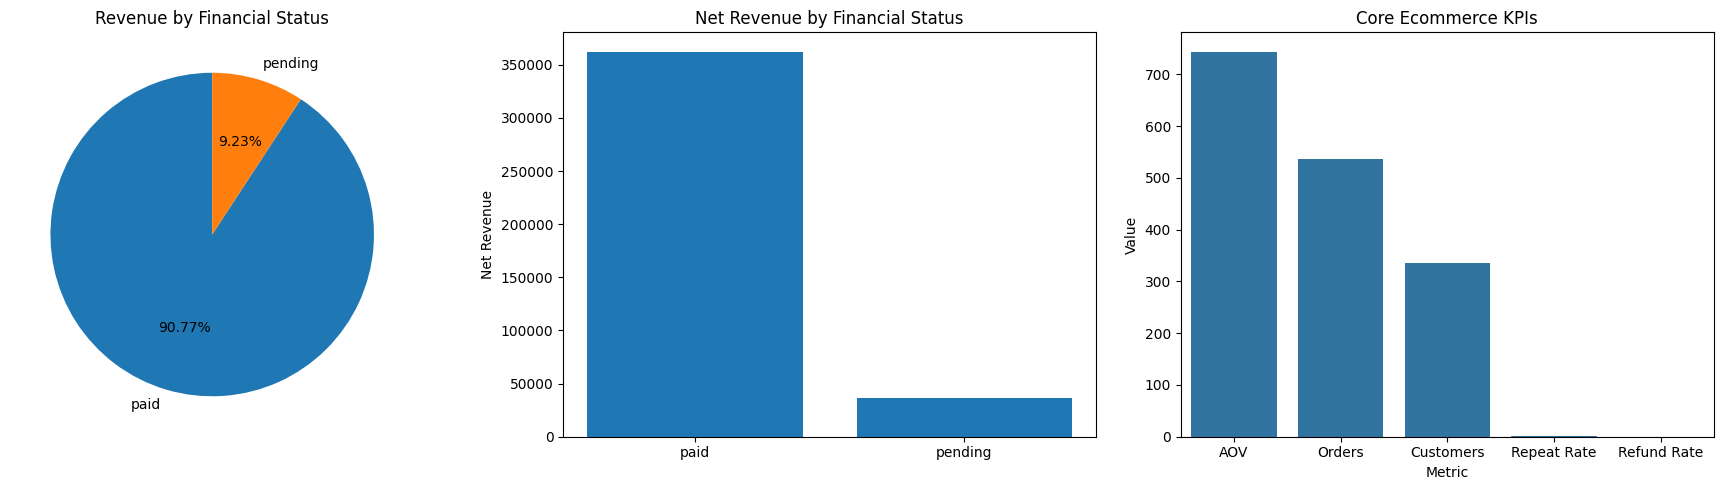

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].pie(revenue_breakdown.values, labels=revenue_breakdown.index, autopct='%1.2f%%', startangle=90)
axes[0].set_title('Revenue by Financial Status')

axes[1].bar(revenue_breakdown.index,revenue_breakdown.values)
axes[1].set_title('Net Revenue by Financial Status')
axes[1].set_ylabel('Net Revenue')
axes[1].tick_params(axis='x', rotation=0)

sns.barplot(data=metric_df, x='Metric', y='Value', ax=axes[2])
axes[2].set_title('Core Ecommerce KPIs')
plt.tight_layout()
plt.savefig('revenue_audit.png', dpi=300, bbox_inches='tight')
plt.show()

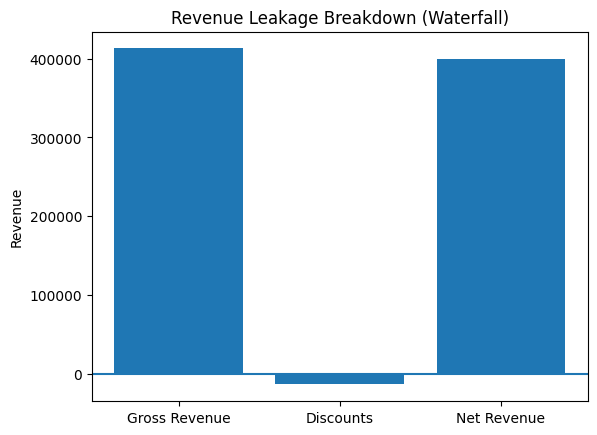

In [9]:
total_revenue = orders['Net Revenue'].sum()
total_discount = orders['Total Discounts'].sum()
revenue_leakage_pct = (total_discount / (total_revenue + total_discount)) * 100


gross_revenue = total_revenue + total_discount
net_revenue = total_revenue

labels = ['Gross Revenue', 'Discounts', 'Net Revenue']
values = [gross_revenue, -total_discount, net_revenue]

cumulative = [0, gross_revenue, gross_revenue - total_discount]

plt.figure()
plt.bar(labels, values)
plt.axhline(0)
plt.title('Revenue Leakage Breakdown (Waterfall)')
plt.ylabel('Revenue')

plt.show()


### 2. Time Series Analysis

In [10]:
rfm

,Customer ID,Frequency,Recency,First Order Date,Monetary Value,Order Count,Recency Days,Tenure Days
0,1001,2,2025-12-01,2025-11-24,2320.0,2,43,50
1,1003,1,2025-12-16,2025-12-16,182.4,1,28,28
2,1004,3,2025-12-03,2025-11-06,1654.8,3,41,68
3,1005,1,2025-12-28,2025-12-28,738.0,1,16,16
4,1006,1,2025-12-31,2025-12-31,328.6,1,13,13
...,...,...,...,...,...,...,...,...
330,1491,1,2025-12-03,2025-12-03,328.6,1,41,41
331,1493,2,2025-11-13,2025-11-03,2154.8,2,61,71
332,1494,2,2025-12-24,2025-12-12,2341.0,2,20,32
333,1495,1,2025-11-10,2025-11-10,229.6,1,64,64


In [11]:
orders

,Order ID,Order Name,Created at,Financial Status,Customer ID,Total Price,Subtotal Price,Total Discounts,Shipping Cost,Total Tax,...,Order Month,Order week,Days Since Order,First Purchase,Variant SKU,Cost per item,Lineitem COGS,Lineitem Gross Profit,Gross Margin %,Gross Revenue
0,110460500,#ORD110460500,2025-11-11,pending,1220,1112.0,900,0,50,162.0,...,11,46,63,2025-11-01,HERB002,110,550,350,38.888889,1112.0
1,110460501,#ORD110460501,2025-11-29,paid,1116,1436.0,1200,30,50,216.0,...,11,48,45,2025-11-29,HERB003,190,760,440,36.666667,1436.0
2,110460502,#ORD110460502,2025-11-15,paid,1376,1426.0,1200,20,30,216.0,...,11,46,59,2025-11-15,HERB003,190,760,440,36.666667,1426.0
3,110460503,#ORD110460503,2025-11-05,paid,1165,1082.0,900,50,70,162.0,...,11,45,69,2025-11-05,HERB002,110,550,350,38.888889,1082.0
4,110460504,#ORD110460504,2025-11-06,paid,1379,279.6,220,30,50,39.6,...,11,45,68,2025-11-06,HERB005,140,140,80,36.363636,279.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,110460492,#ORD60492,2025-12-16,paid,1380,444.8,360,30,50,64.8,...,12,51,28,2025-12-16,HERB002,110,220,140,38.888889,444.8
533,110460493,#ORD60493,2025-12-04,paid,1468,1062.0,900,50,50,162.0,...,12,49,40,2025-12-04,HERB002,110,550,350,38.888889,1062.0
534,110460494,#ORD60494,2025-12-12,paid,1436,1485.0,1250,20,30,225.0,...,12,50,32,2025-12-12,HERB001,160,800,450,36.000000,1485.0
535,110460498,#ORD60498,2025-12-04,paid,1153,444.8,360,50,70,64.8,...,12,49,40,2025-12-04,HERB002,110,220,140,38.888889,444.8


1. Monthly Revenue trend

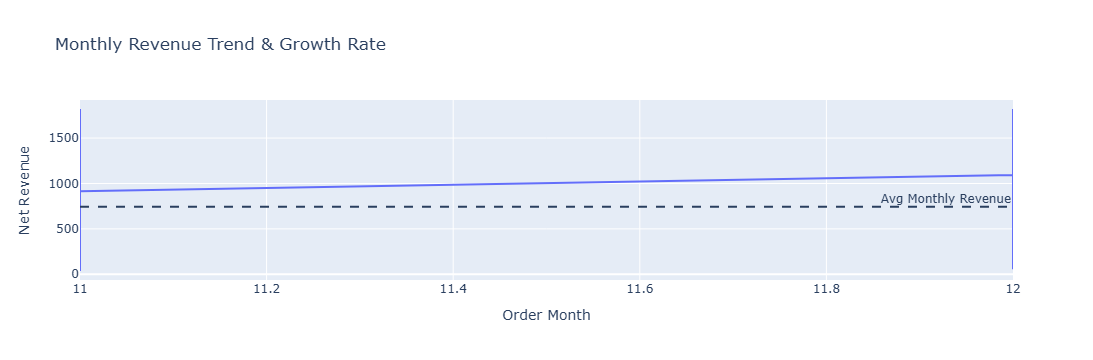

In [12]:
fig = px.line(orders, x='Order Month', y='Net Revenue', 
              title='Monthly Revenue Trend & Growth Rate')
fig.add_hline(y=orders['Net Revenue'].mean(), line_dash="dash", 
              annotation_text="Avg Monthly Revenue")
fig.write_html('monthly_trend.html')
fig.show()

2. Seasonality heatmap

In [13]:
heatmap_data = orders.groupby(['Order Year', 'Order week'])['Net Revenue'].sum().reset_index()
heatmap_matrix = heatmap_data.pivot(
    index='Order Year',
    columns='Order week',
    values='Net Revenue'
)

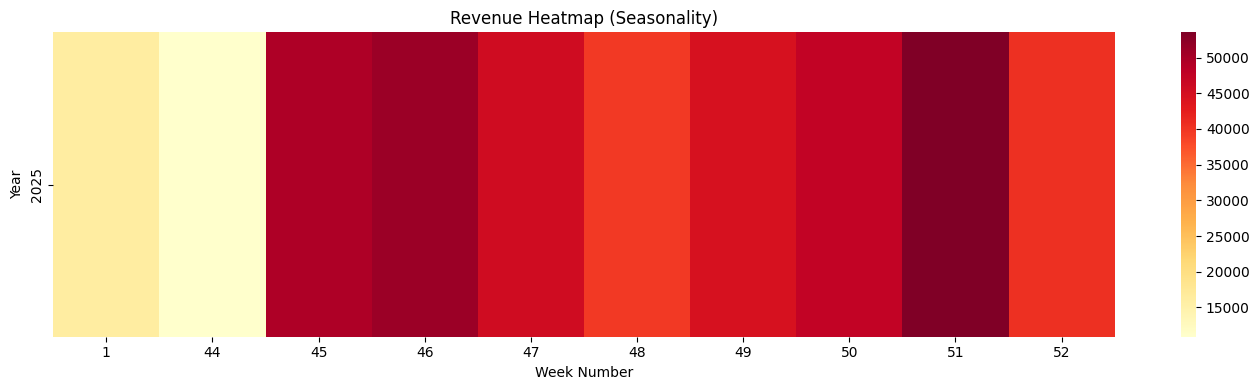

In [14]:
plt.figure(figsize=(14, 4))
sns.heatmap(heatmap_matrix, annot=False, cmap='YlOrRd')
plt.title('Revenue Heatmap (Seasonality)')
plt.xlabel('Week Number')
plt.ylabel('Year')
plt.tight_layout()
plt.savefig('seasonality_heatmap.png', dpi=300)
plt.show()

3. Customer Segmentation

In [15]:
snapshot_date = df['Created at'].max()
rfm = df.groupby('Customer ID').agg({
    'Created at': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Net Revenue': 'sum'  # Monetary
}).round(0).rename(columns={'Created at': 'Recency', 'Order ID': 'Frequency', 'Net Revenue': 'Monetary'})


rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=False, duplicates='drop') + 1  
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [16]:
segment_rev = rfm.groupby('RFM_Score')['Monetary'].sum().sort_values(ascending=False)
print("Top 5 RFM Segments by Revenue Contribution:")
print(segment_rev.head())

Top 5 RFM Segments by Revenue Contribution:
RFM_Score
525    35903.0
114    26575.0
414    24117.0
515    23954.0
425    20643.0
Name: Monetary, dtype: float64


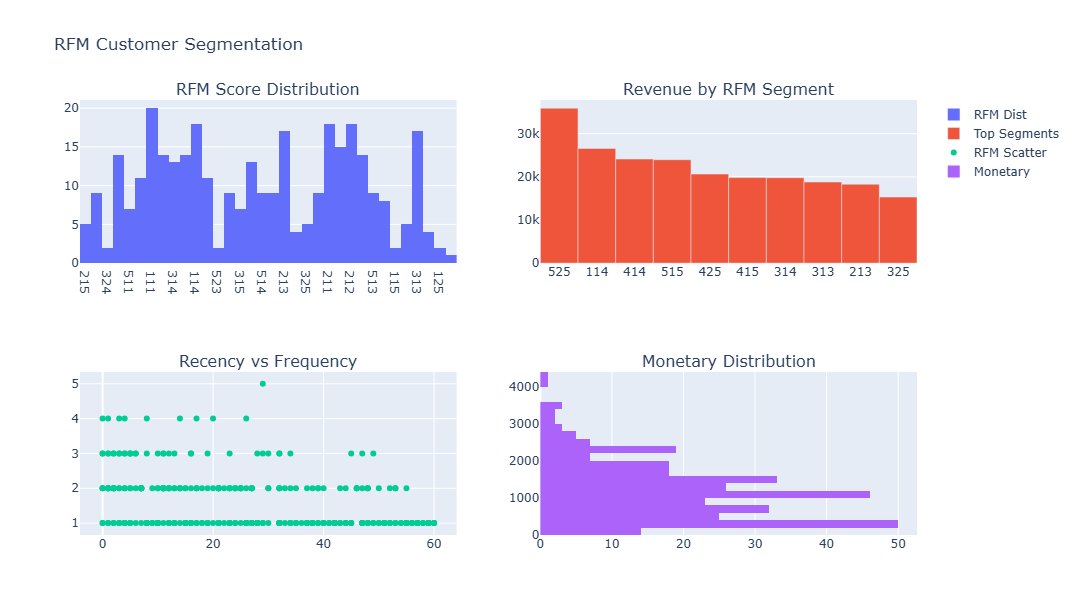

In [17]:
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=('RFM Score Distribution', 'Revenue by RFM Segment', 
                                  'Recency vs Frequency', 'Monetary Distribution'))
fig.add_trace(go.Histogram(x=rfm['RFM_Score'], name='RFM Dist'), row=1, col=1)
fig.add_trace(go.Bar(x=segment_rev.index[:10], y=segment_rev.values[:10], name='Top Segments'), row=1, col=2)
fig.add_trace(go.Scatter(x=rfm['Recency'], y=rfm['Frequency'], mode='markers', name='RFM Scatter'), row=2, col=1)
fig.add_trace(go.Histogram(y=rfm['Monetary'], name='Monetary'), row=2, col=2)
fig.update_layout(height=600, title_text="RFM Customer Segmentation")
fig.write_html('rfm_preview.html')
fig.show()

4. Product Profitability

In [18]:
print("Top 5 Most Profitable SKUs:")
sku_summary = orders.groupby('Lineitem name').agg({
    'Gross Revenue' : 'sum',
    'Lineitem Gross Profit': 'sum',
    'Gross Margin %': 'mean'}).reset_index()
print(sku_summary.sort_values('Lineitem Gross Profit', ascending=False).head(5))

Top 5 Most Profitable SKUs:
     Lineitem name  Gross Revenue  Lineitem Gross Profit  Gross Margin %
4    Tulsi Shampoo       114650.0                  34650       36.666667
0    Aloe Vera Gel       102177.6                  30480       36.363636
1    Amla Hair Oil        93320.0                  27720       36.000000
2   Neem Face Wash        68518.8                  21840       38.888889
3  Sandalwood Soap        34146.2                  12040       44.444444


In [19]:
top_skus = sku_summary.sort_values('Lineitem Gross Profit', ascending=False).head(10).copy()
top_skus['Lineitem name short'] = top_skus['Lineitem name'].str.slice(0, 30)

sku_summary['cumulative_profit_pct'] = sku_summary['Lineitem Gross Profit'].rank(ascending=False) / len(sku_summary)
pareto_skus = sku_summary[sku_summary['cumulative_profit_pct'] <= 0.8]

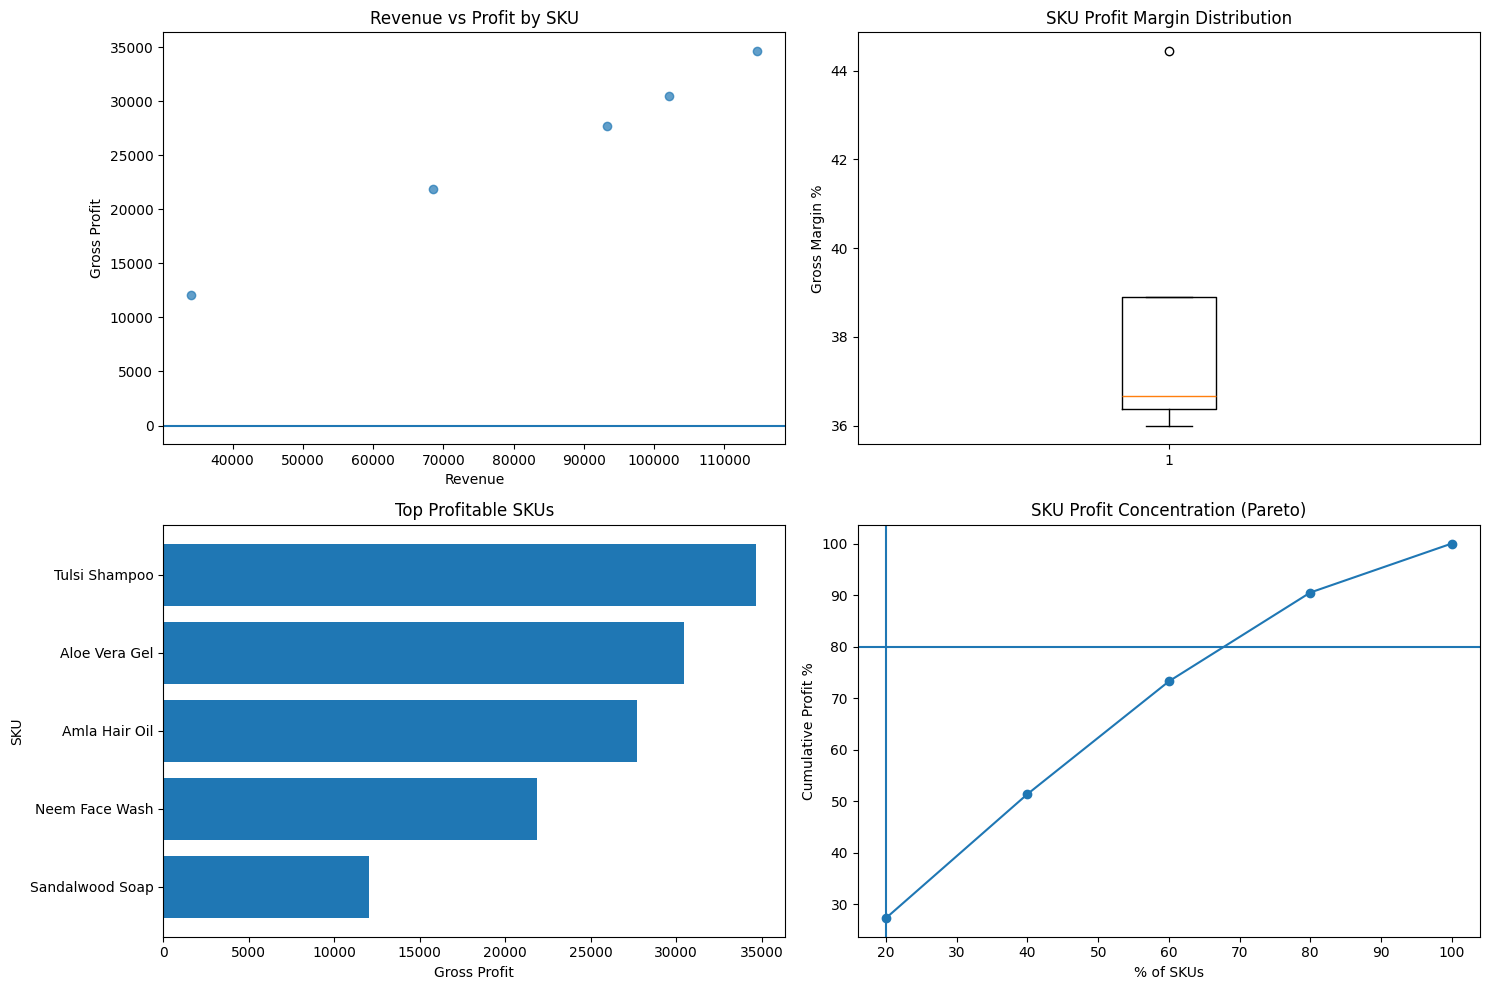

In [21]:
top_skus = (
    sku_summary
    .sort_values('Lineitem Gross Profit', ascending=False)
    .head(10)
    .copy()
)

top_skus['Lineitem name short'] = top_skus['Lineitem name'].str.slice(0, 30)
sku_sorted = sku_summary.sort_values(
    'Lineitem Gross Profit', ascending=False
).reset_index(drop=True)

sku_sorted['cumulative_profit'] = sku_sorted['Lineitem Gross Profit'].cumsum()
sku_sorted['cumulative_profit_pct'] = (
    sku_sorted['cumulative_profit'] /
    sku_sorted['Lineitem Gross Profit'].sum()
) * 100

sku_sorted['sku_pct'] = (
    (sku_sorted.index + 1) / len(sku_sorted)
) * 100
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].scatter(
    sku_summary['Gross Revenue'],
    sku_summary['Lineitem Gross Profit'],
    alpha=0.7
)

axes[0, 0].axhline(0)
axes[0, 0].set_xlabel('Revenue')
axes[0, 0].set_ylabel('Gross Profit')
axes[0, 0].set_title('Revenue vs Profit by SKU')
axes[0, 1].boxplot(sku_summary['Gross Margin %'])
axes[0, 1].set_ylabel('Gross Margin %')
axes[0, 1].set_title('SKU Profit Margin Distribution')
axes[1, 0].barh(
    top_skus['Lineitem name short'],
    top_skus['Lineitem Gross Profit']
)

axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Gross Profit')
axes[1, 0].set_ylabel('SKU')
axes[1, 0].set_title('Top Profitable SKUs')
axes[1, 1].plot(
    sku_sorted['sku_pct'],
    sku_sorted['cumulative_profit_pct'],
    marker='o'
)

axes[1, 1].axhline(80)
axes[1, 1].axvline(20)

axes[1, 1].set_xlabel('% of SKUs')
axes[1, 1].set_ylabel('Cumulative Profit %')
axes[1, 1].set_title('SKU Profit Concentration (Pareto)')
plt.tight_layout()
plt.savefig('sku_profitability.png', dpi=300, bbox_inches='tight')
plt.show()
